In [13]:
import sys
sys.path.insert(0, "/Users/aimachine/PyImage/utils")
import numpy as np
from scipy import signal
import scipy.fftpack as fftpack
from scipy.fftpack import fftfreq
import matplotlib.pyplot as plt
import os
import math
import cv2 as cv
from skimage import data, color, io, img_as_float
from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
from scipy.ndimage.morphology import binary_dilation, binary_erosion
from skimage.feature import canny
from scipy.signal import blackman
from tifffile import imread
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.fftpack import fft
from plot_utils import multiplot
from matplotlib.colors import LogNorm
from skimage.filters import threshold_mean, sobel
from skimage.filters import threshold_otsu, threshold_local
from skimage import feature
from Normalize import normalizeFloat, normalizeMinMax, Path, save_tiff_imagej_compatible

In [14]:
targetdir = '/Users/aimachine/Documents/KymoGraphsForFFT/NewKymographs'
sourceimage = '/Users/aimachine/Documents/KymoGraphsForFFT/NewKymographs/KymographN5Circle.tif'

base = os.path.split(sourceimage)[-1]

Filename = os.path.splitext(base)

In [15]:
Xcalibration = 0.212
Tcalibration = 5
#Enter start y pixel unit for the section
StartSection = 0
#Enter end y pixel unit for section
EndSection = 600
#Enter start y pixel unit for the section
TStartSection = 0


axes = 'XY'

0.04855988 0.056924164 0.0


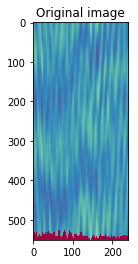

In [21]:
image = imread(sourceimage)
cutimage = image[StartSection:EndSection, :]
plt.figure()
plt.imshow(cutimage, plt.cm.Spectral)
plt.title('Original image')
#Make Binary

max = np.amax(cutimage)
min = np.amin(cutimage)
thresh = threshold_mean(cutimage)
print(thresh, max, min)
 
binary = cutimage > thresh



h, theta, d = hough_line(binary)

Slope Values found :  -0.6893729484387693
Slope Values found :  -0.9657176771078081
Slope Values found :  -0.9657176771078081
Slope Values found :  0.6893729484387667
Slope Values found :  -0.9657176771078081
Slope Values found :  -1.6101910473656027
Slope Values found :  -0.9657176771078081
Slope Values found :  -0.6893729484387693


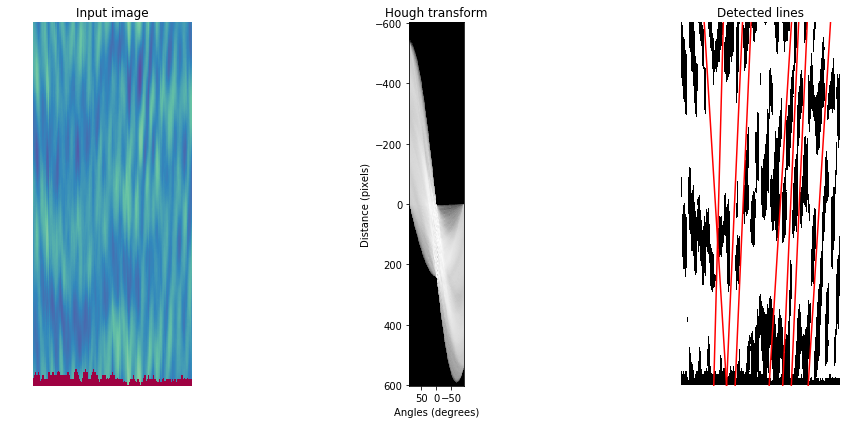

In [28]:
# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(cutimage, cmap=cm.Spectral)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
             cmap=cm.gray, aspect=1/1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(binary, cmap=cm.gray)
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - binary.shape[1] * np.cos(angle)) / np.sin(angle)
    slope =  -np.cos(angle) / np.sin(angle) * Xcalibration / Tcalibration
    #Draw high slopes
    if np.abs(slope) > 0.6:
     print("Slope Values found : " ,slope  )
    
     ax[2].plot((0, binary.shape[1]), (y0, y1), '-r')
    
ax[2].set_xlim((0, binary.shape[1]))
ax[2].set_ylim((binary.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

plt.tight_layout()
plt.show()



for a in ax:
    a.set_axis_off()




